In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn import metrics

In [3]:
from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [5]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
exercise_df = exercise.merge(calories , on = "User_ID")
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
print("This dataset has " , exercise_df.shape[0] ," instances and ",  exercise_df.shape[1] , " columns.")

This dataset has  15000  instances and  9  columns.


In [9]:
print("Columns : ")
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
  print("\t" , i + 1 , "." ,  column)

Columns : 
	 1 . User_ID
	 2 . Gender
	 3 . Age
	 4 . Height
	 5 . Weight
	 6 . Duration
	 7 . Heart_Rate
	 8 . Body_Temp
	 9 . Calories


In [10]:
exercise_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


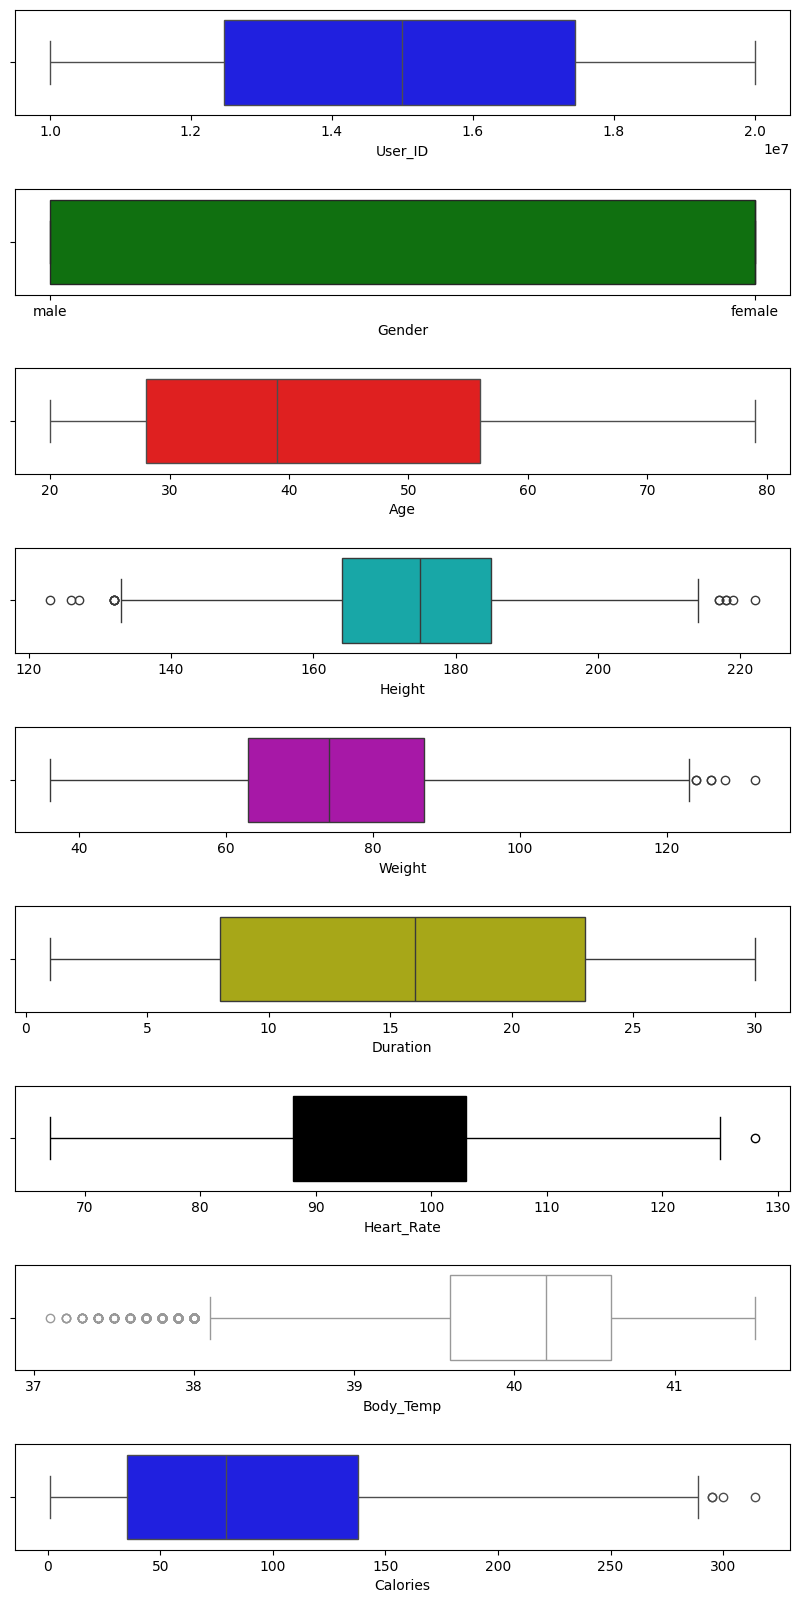

In [11]:
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(exercise_df.columns) , 1 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension
for i , column in zip(range(len(exercise_df.columns)) , exercise_df.columns):
  try:
    sns.boxplot(data = exercise_df , x = column , color = c[i] , ax = axes[i])
  except:
    fig1.delaxes(axes[i])
    continue

In [12]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<Axes: >

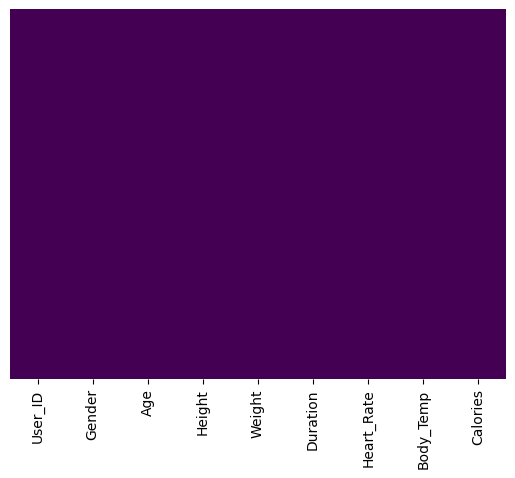

In [13]:
sns.heatmap(exercise_df.isnull() , yticklabels = False , cbar = False , cmap = "viridis")

In [14]:
print("The shape of dataset before dropping duplicates : " , exercise_df.shape)
exercise_df.drop_duplicates(subset = ['User_ID'], keep='last' , inplace = True)    # Keeping the first example of duplicates in 'User_ID' column.
print("The shape of dataset after dropping duplicates : " , exercise_df.shape)

The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)


In [15]:
exercise_df.drop(columns = "User_ID" , inplace = True)

In [16]:
exercise_train_data , exercise_test_data = train_test_split(exercise_df , test_size = 0.2 , random_state = 1)
print("Shape of training data : " , exercise_train_data.shape)
print("Shape of test data : " , exercise_test_data.shape)

Shape of training data :  (12000, 8)
Shape of test data :  (3000, 8)


In [17]:
from matplotlib import style
style.use("bmh")

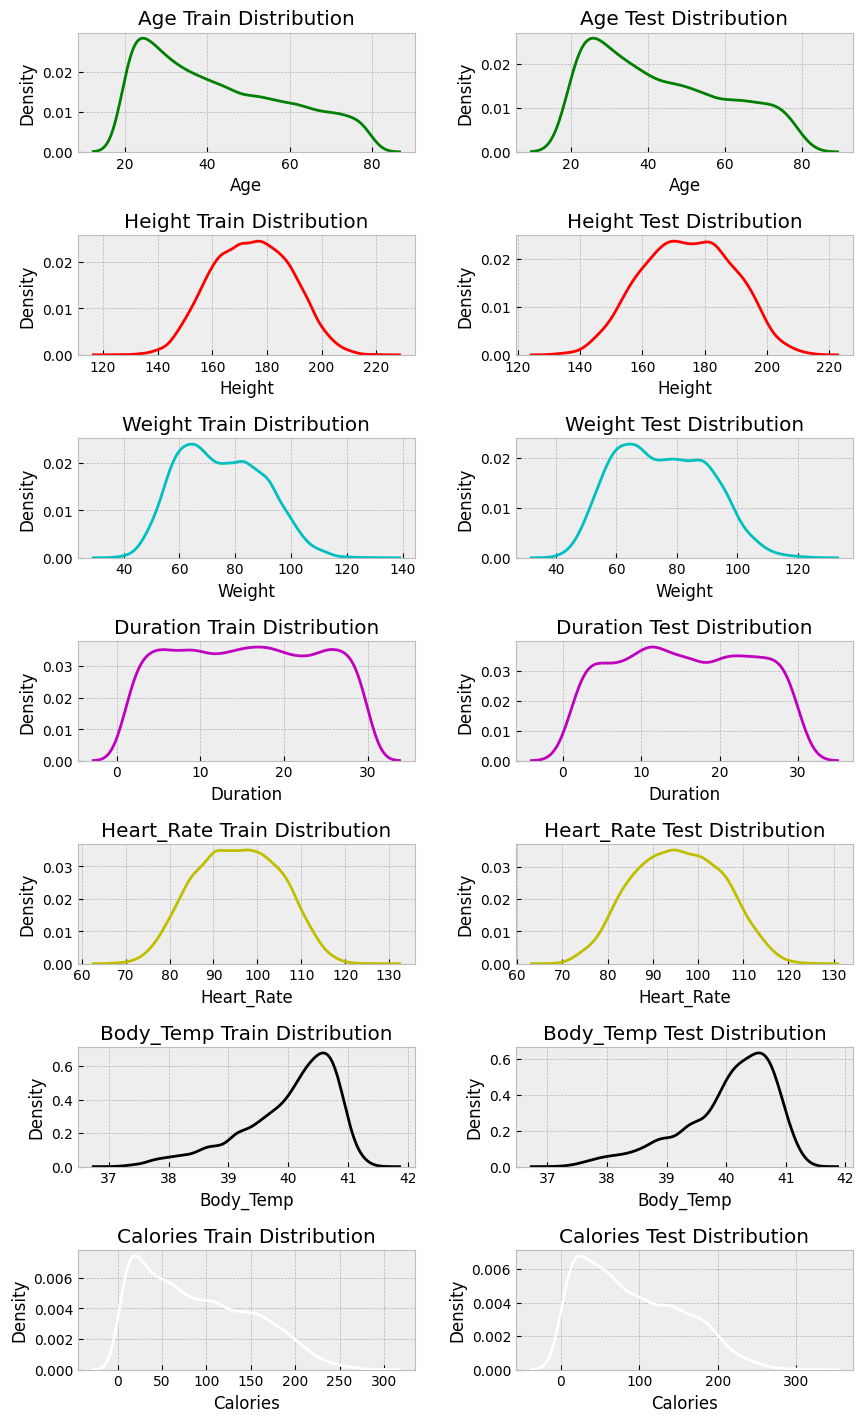

In [18]:
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(exercise_train_data.columns) , 2 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension

for i , column , color in zip(range(0 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c):
  try:
    axes[i].title.set_text(column + " Train Distribution")
    sns.kdeplot(data = exercise_train_data , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue

for i , column , color in zip(range(1 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c):
  try:
    axes[i].title.set_text(column + " Test Distribution")
    sns.kdeplot(data = exercise_test_data , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue


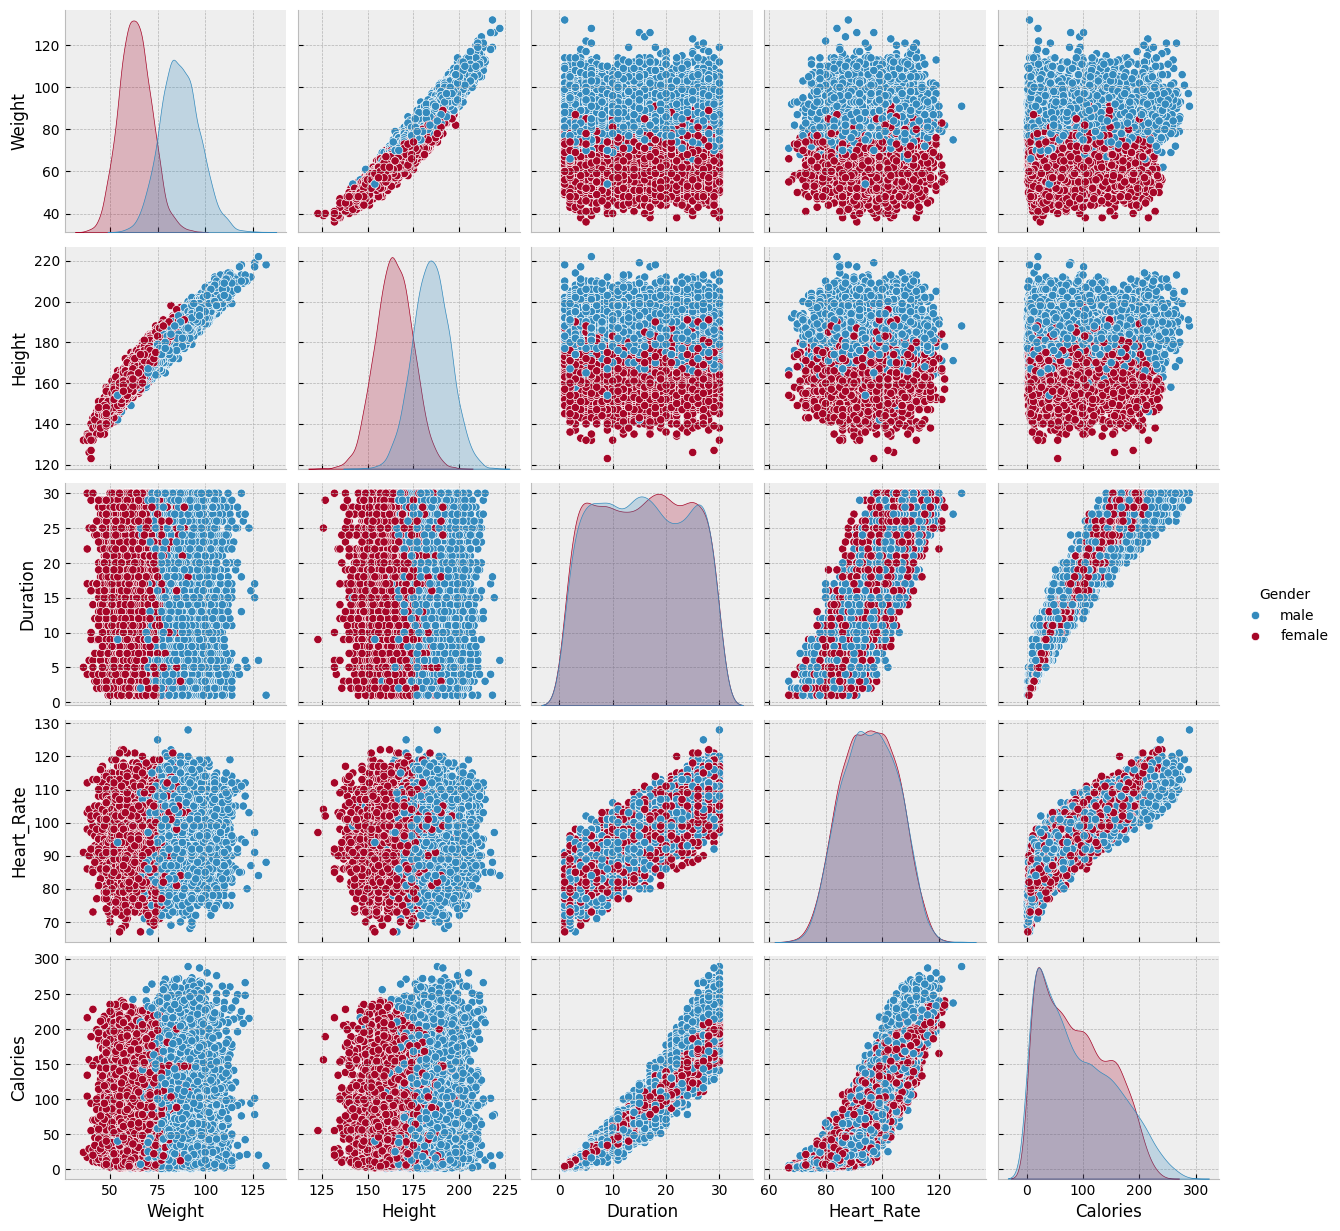

In [19]:
sns.pairplot(exercise_train_data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

In [20]:
print('Minimum age in dataset is : ' , exercise_train_data["Age"].min())
print('Maximum age in dataset is : ' , exercise_train_data["Age"].max())

Minimum age in dataset is :  20
Maximum age in dataset is :  79


In [21]:
age_groups = ["Young" , "Middle-Aged" , "Old"]
exercise_train_data["age_groups"] = pd.cut(exercise_train_data["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)
exercise_train_data["age_groups"].head()

,age_groups
2643,Old
13352,Old
13117,Old
2560,Old
14297,Middle-Aged


In [22]:
exercise_train_data["age_groups"].value_counts()


,count
age_groups,
Young,6029
Middle-Aged,3535
Old,2436


<Axes: xlabel='age_groups', ylabel='count'>

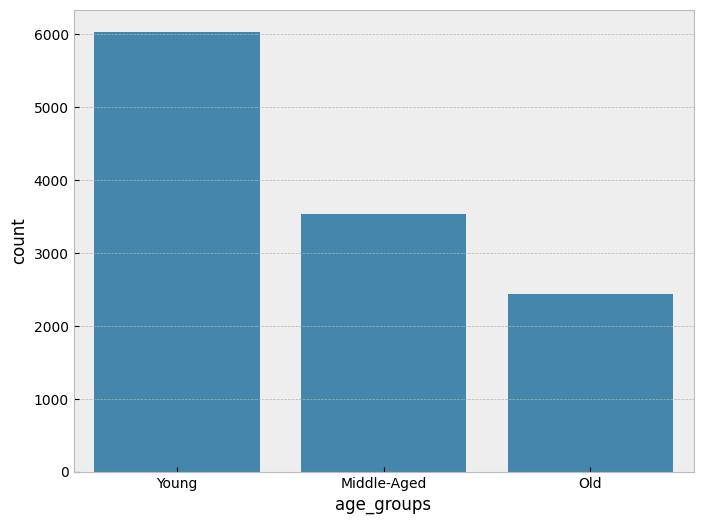

In [23]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data = exercise_train_data , x = "age_groups")

In [24]:
fig = px.box(exercise_train_data , x= "age_groups" , y = "Calories" , color = "Gender")

fig.update_layout(
    width=700,
    height=450,
)

fig.show()

In [25]:
fig = px.box(exercise_train_data , x= "age_groups" , y = "Duration" , color = "Gender")

fig.update_layout(
    width=750,
    height=450,
)

fig.show()

<Axes: xlabel='Gender', ylabel='count'>

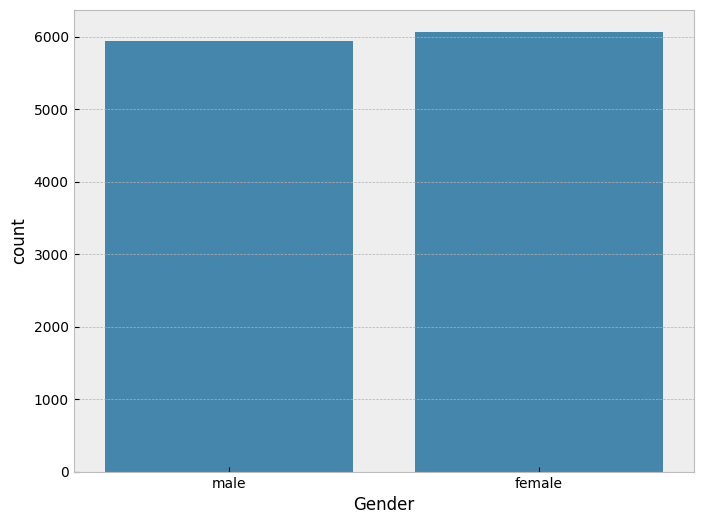

In [26]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data = exercise_train_data , x = "Gender")

In [27]:
fig = px.box(exercise_train_data , x= "Gender" , y = "Duration")

fig.update_layout(
    width=700,
    height=450,
)

fig.show()

In [28]:
fig = px.box(exercise_train_data , x= "Gender" , y = "Heart_Rate")

fig.update_layout(
    width=700,
    height=450,
)

fig.show()

In [29]:
for data in [exercise_train_data , exercise_test_data]:         # adding BMI column to both training and test sets
  data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
  data["BMI"] = round(data["BMI"] , 2)

In [30]:
bmi_category = ["Very severely underweight" , "Severely underweight" ,
                "Underweight" , "Normal" ,
                "Overweight" , "Obese Class I" ,
                "Obese Class II" , "Obese Class III"]

exercise_train_data["Categorized_BMI"] = pd.cut(exercise_train_data["BMI"] , bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50]
                                              , right = False , labels = bmi_category)

exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object") # converting 'categorical' dtype intp 'object' dtype for "Categorized_BMI" column
exercise_train_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI,Categorized_BMI
2643,male,62,172.0,81.0,14.0,88.0,40.5,68.0,Old,27.38,Overweight
13352,male,77,182.0,83.0,28.0,108.0,40.8,241.0,Old,25.06,Overweight
13117,female,73,170.0,71.0,16.0,91.0,40.2,83.0,Old,24.57,Normal
2560,male,76,176.0,81.0,24.0,94.0,40.7,154.0,Old,26.15,Overweight
14297,male,42,183.0,77.0,7.0,93.0,39.8,32.0,Middle-Aged,22.99,Normal


In [31]:
ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI" , "Count"]
ds

,Categorized_BMI,Count
0,Normal,7819
1,Overweight,4181


<Axes: xlabel='Categorized_BMI', ylabel='Count'>

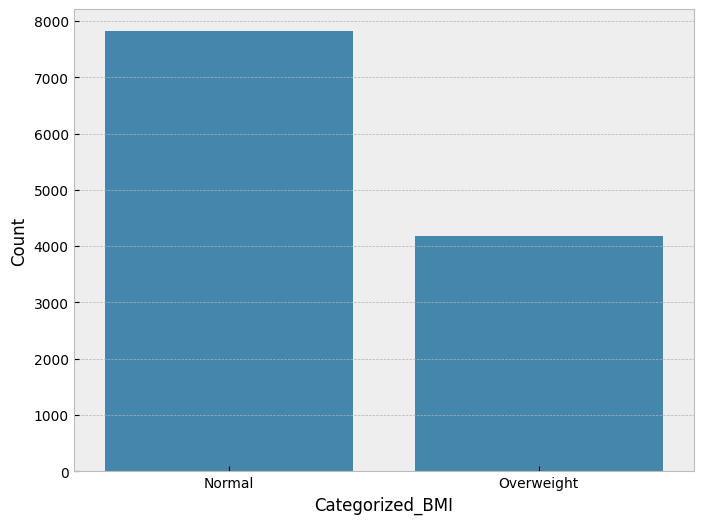

In [32]:
ds = ds[(ds["Categorized_BMI"] == "Normal") | (ds["Categorized_BMI"] == "Overweight")]
#ds["Categorized_BMI"] = ds["Categorized_BMI"].astype("object")

plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count")

In [33]:
ds =exercise_train_data[["Gender" ,"Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["Gender" , "Categorized_BMI"])
ds.columns = ["Gender" , "Categorized_BMI" , "Count"]
ds

,Gender,Categorized_BMI,Count
0,female,Normal,5572
3,female,Overweight,496
2,male,Normal,2247
1,male,Overweight,3685


<Axes: xlabel='Categorized_BMI', ylabel='Count'>

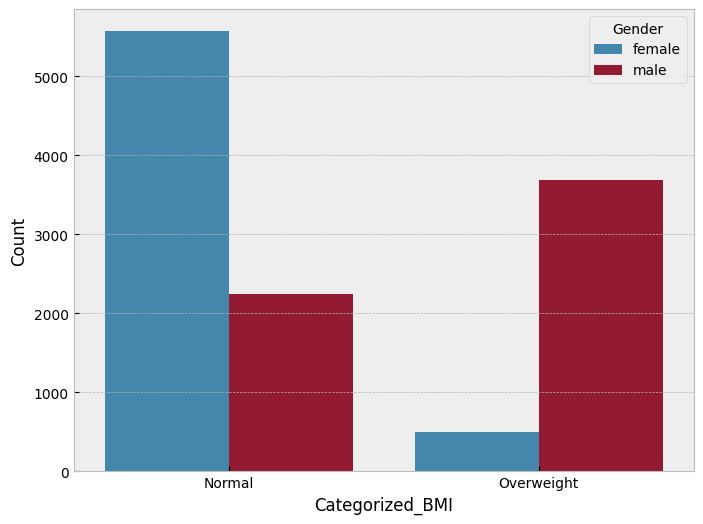

In [34]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count" , hue = "Gender")

In [35]:
ds =exercise_train_data[["age_groups" ,"Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["age_groups" , "Categorized_BMI"])
ds.columns = ["age_groups" , "Categorized_BMI" , "Count"]
ds

,age_groups,Categorized_BMI,Count
0,Young,Normal,4369
2,Young,Overweight,1660
1,Middle-Aged,Normal,2197
3,Middle-Aged,Overweight,1338
4,Old,Normal,1253
5,Old,Overweight,1183


<Axes: xlabel='Categorized_BMI', ylabel='Count'>

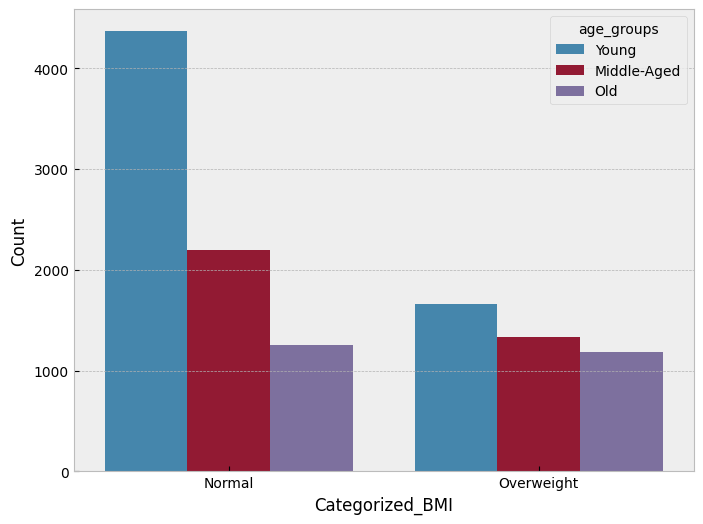

In [36]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count" , hue = "age_groups")

In [37]:
fig = px.scatter(exercise_train_data , x = "Duration" , y = "Body_Temp" , size = "Calories")

fig.update_layout(
    width=700,
    height=450,
)

fig.show()

In [38]:
exercise_train_data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'age_groups', 'BMI', 'Categorized_BMI'],
      dtype='object')

<Axes: >

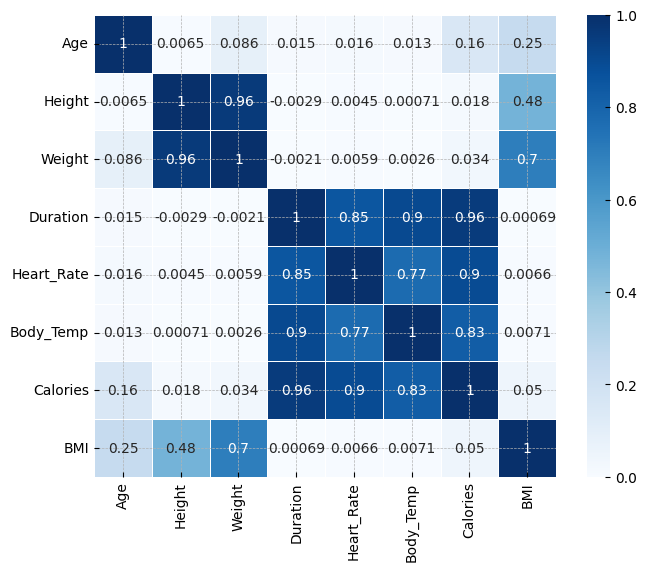

In [39]:
plt.rcParams["figure.figsize"] = 8 , 6
corr = exercise_train_data.corr(numeric_only = True)
sns.heatmap(corr , annot = True , square = True , linewidth = .5 , vmin = 0 , vmax = 1 , cmap = 'Blues')

In [40]:
exercise_train_data = exercise_train_data[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_test_data = exercise_test_data[["Gender" , "Age" , "BMI"  , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_train_data = pd.get_dummies(exercise_train_data, drop_first = True)
exercise_test_data = pd.get_dummies(exercise_test_data, drop_first = True)

In [41]:
X_train = exercise_train_data.drop("Calories" , axis = 1)
y_train = exercise_train_data["Calories"]

X_test = exercise_test_data.drop("Calories" , axis = 1)
y_test = exercise_test_data["Calories"]

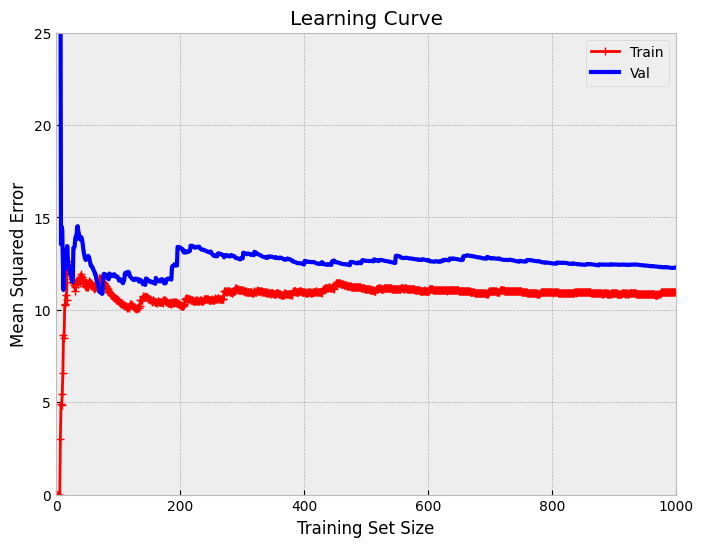

In [42]:
train_errors , val_errors = [] , []
def plot_learning_curve(model):
  for m in range(1 , 1000):
    model.fit(X_train[:m] , y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_test[:m])
    train_errors.append(mean_squared_error(y_train[:m] , y_train_predict))
    val_errors.append(mean_squared_error(y_test[:m] , y_val_predict))

  plt.plot(np.sqrt(train_errors) , "r-+" , linewidth = 2 , label = "Train")
  plt.plot(np.sqrt(val_errors) , "b-" , linewidth = 3 , label = "Val")
  plt.title("Learning Curve")
  plt.xlabel("Training Set Size")
  plt.ylabel("Mean Squared Error")
  plt.xlim([0 , 1000])
  plt.ylim([0 , 25])
  plt.legend()
linreg = LinearRegression()
plot_learning_curve(linreg)

In [43]:
linreg = LinearRegression()
linreg.fit(X_train , y_train)
linreg_prediction = linreg.predict(X_test)

In [44]:
print("Linear Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , linreg_prediction) , 2))
print("Linear Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))
print("Linear Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , linreg_prediction)) , 2))

Linear Regression Mean Absolute Error(MAE) :  8.52
Linear Regression Mean Squared Error(MSE) :  140.08
Linear Regression Root Mean Squared Error(RMSE) :  11.84


In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(X_train , y_train)
random_reg_prediction = random_reg.predict(X_test)

In [47]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))

RandomForest Mean Absolute Error(MAE) :  5.33
RandomForest Mean Squared Error(MSE) :  69.2
RandomForest Root Mean Squared Error(RMSE) :  8.32


In [48]:
exercise_train_data.iloc[32]

,5897
Age,23
BMI,24.88
Duration,27.0
Heart_Rate,102.0
Body_Temp,40.3
Calories,140.0
Gender_male,True


In [49]:
X_array = np.array([[24 , 25 , 28 , 100 , 40 , 1]]).reshape(1 , -1)
y_pred = random_reg.predict(X_array)
print("Prediction : " , round(y_pred[0] , 2))

Prediction :  143.59
